In [13]:
# Importing required python libraries
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
#All_data.columns

In [15]:
# Changing the current working directory
os.chdir(r"C:\Users\emman\Desktop\Masterthesis\basic triangulation on kitti\Opencv\error\252M robust")

# Getting the FileNames of all .csv files in the current dir.
filenames = [i for i in glob.glob(f"*.txt")] 

# Loading all the csv files to create a list of data frames
df = [pd.read_csv(file, sep = ",", header=None, engine = 'python' ) 
      for file in filenames]

for i in range(0,len(df)):

    df[i].columns = df[i].iloc[0]  # Creating first row as Header
    df[i] = df[i].drop(0)          # Removing first row



All_data_82gc = pd.concat(df, axis=1)                   ## Concatenating the data

In [16]:
#convert to numeric
All_data_82gc.loc[:, All_data_82gc.columns != 'classes']=All_data_82gc.loc[:, All_data_82gc.columns != 'classes'].apply(pd.to_numeric)

All_data_82gc1= All_data_82gc.drop(['classes'], axis=1)

In [17]:
All_data_82gc1.head(3)

,Real depth [m],bm 252 robust,gc 252,sgbm 252,ssd 252,stereo rcnn 252,Tlnet 252
1,10.0,0.087918,0.093884,0.114477,0.134156,-0.017518,-0.018
2,32.8,-0.010975,0.010086,-0.010975,0.010086,0.006583,0.021098
3,41.01,0.012898,-0.05565,-0.034106,0.049915,0.027983,0.080663


In [18]:
All_data_82gc.head(3)

,classes,Real depth [m],bm 252 robust,gc 252,sgbm 252,ssd 252,stereo rcnn 252,Tlnet 252
1,Car,10.0,0.087918,0.093884,0.114477,0.134156,-0.017518,-0.018
2,Car,32.8,-0.010975,0.010086,-0.010975,0.010086,0.006583,0.021098
3,Car,41.01,0.012898,-0.05565,-0.034106,0.049915,0.027983,0.080663


In [19]:
#All_data_82gc = All_data_82gc.astype('float')

In [20]:
#All_data_82gc['classes'] = All_data_82gc['classes'].astype('category')
All_data_82gc.dtypes

0
classes            object
Real depth [m]     object
bm 252 robust      object
gc 252             object
sgbm 252           object
ssd 252            object
stereo rcnn 252    object
Tlnet 252          object
dtype: object

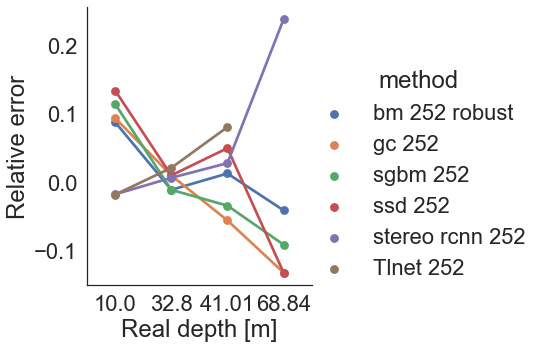

In [21]:
sns.set(font_scale = 2)
sns.set_style("white")
All_data_82gc1=All_data_82gc1.melt("Real depth [m]", var_name='method',value_name='Relative error')
g=sns.catplot(x="Real depth [m]",y="Relative error",hue="method",data=All_data_82gc1,kind="point")
plt.savefig("252 robust.png",dpi=300, bbox_inches = 'tight')
plt.savefig("252 robust.eps",dpi=300, bbox_inches = 'tight')
plt.savefig("252 robust.pdf",dpi=300, bbox_inches = 'tight')

In [22]:
All_data_82gc.head(3)

,classes,Real depth [m],bm 252 robust,gc 252,sgbm 252,ssd 252,stereo rcnn 252,Tlnet 252
1,Car,10.0,0.087918,0.093884,0.114477,0.134156,-0.017518,-0.018
2,Car,32.8,-0.010975,0.010086,-0.010975,0.010086,0.006583,0.021098
3,Car,41.01,0.012898,-0.05565,-0.034106,0.049915,0.027983,0.080663


In [23]:
#df2=All_data.dropna(inplace =True)

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Real depth [m]'),
  Text(2, 0, 'bm 252 robust'),
  Text(3, 0, 'gc 252'),
  Text(4, 0, 'sgbm 252'),
  Text(5, 0, 'ssd 252'),
  Text(6, 0, 'stereo rcnn 252'),
  Text(7, 0, 'Tlnet 252')])

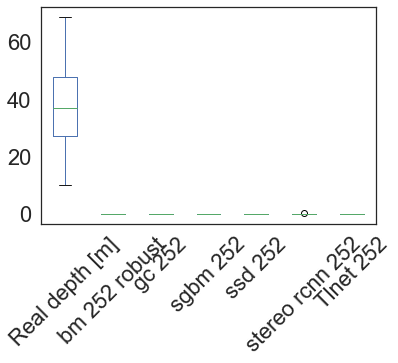

In [24]:
All_data_82gc.plot.box()
plt.xticks(rotation = 45)